# Project name: Sales and Customer Behavior Analytics

Objective:
To perform exploratory data analysis (EDA) on a retail and sales dataset to extract actionable insights on sales performance, customer behavior, and product trends.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Load the Dataset
df = pd.read_csv(r"C:\supermarket_sales.csv")
print(df.head())

    invoice_id branch       city customer_type gender_customer  \
0  750-67-8428      A     Yangon        Member          Female   
1  226-31-3081      C  Naypyitaw        Normal          Female   
2  631-41-3108      A     Yangon        Normal            Male   
3  123-19-1176      A     Yangon        Member            Male   
4  373-73-7910      A     Yangon        Normal            Male   

             product_line  unit_cost  quantity  5pct_markup   revenue  \
0       Health and beauty      74.69         7      26.1415  548.9715   
1  Electronic accessories      15.28         5       3.8200   80.2200   
2      Home and lifestyle      46.33         7      16.2155  340.5255   
3       Health and beauty      58.22         8      23.2880  489.0480   
4       Sports and travel      86.31         7      30.2085  634.3785   

        date   time payment_method    cogs    gm_pct  gross_income  rating  
0   01/05/19  13:08        Ewallet  522.83  4.761905       26.1415     9.1  
1   03/08/

In [108]:
#  Basic Dataset Info
print(df.info())       
print(df.describe())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_id       1000 non-null   object 
 1   branch           1000 non-null   object 
 2   city             1000 non-null   object 
 3   customer_type    1000 non-null   object 
 4   gender_customer  1000 non-null   object 
 5   product_line     1000 non-null   object 
 6   unit_cost        1000 non-null   float64
 7   quantity         1000 non-null   int64  
 8   5pct_markup      1000 non-null   float64
 9   revenue          1000 non-null   float64
 10  date             1000 non-null   object 
 11  time             1000 non-null   object 
 12  payment_method   1000 non-null   object 
 13  cogs             1000 non-null   float64
 14  gm_pct           1000 non-null   float64
 15  gross_income     1000 non-null   float64
 16  rating           1000 non-null   float64
dtypes: float64(7), 

In [110]:
#Convert Date and Time to usable formats
df['date'] = pd.to_datetime(df['date'], dayfirst=False, errors='coerce')

df['Month'] = df['date'].dt.to_period('M')
df['Day'] = df['date'].dt.day_name()

df['time'] = pd.to_datetime(df['time'], format='%H:%M')
df['Hour'] = df['time'].dt.hour


C:\Users\SWAROOP\AppData\Local\Temp\ipykernel_12560\4222607336.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=False, errors='coerce')


## Visualized daily sales trends to analyze performance patterns.

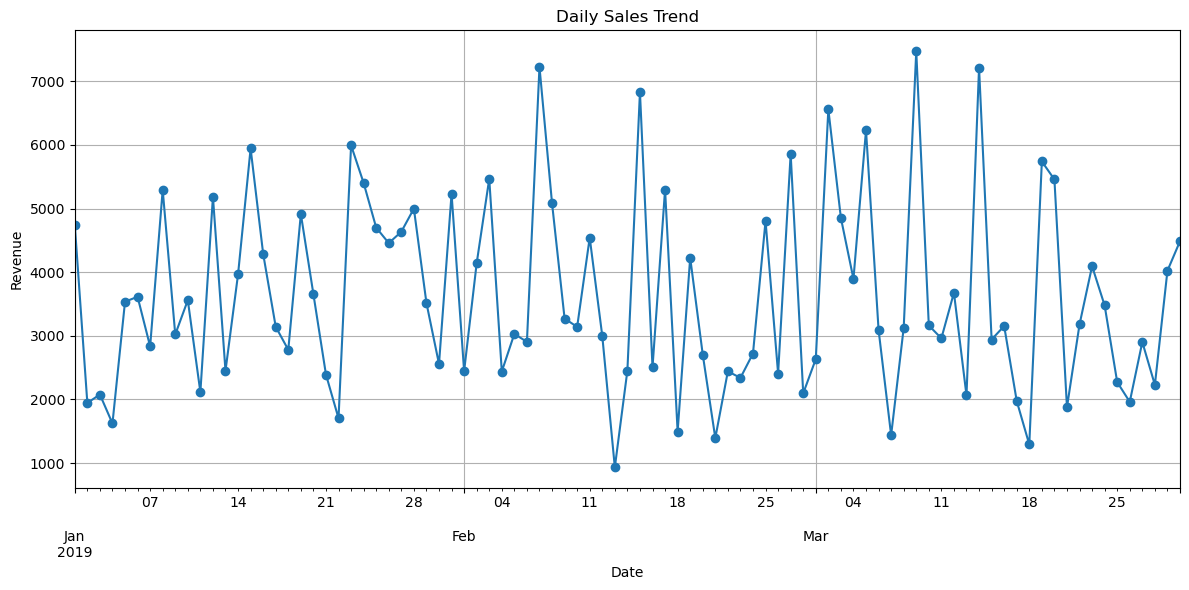

In [113]:
#Plot Daily Sales Trend
daily_sales = df.groupby('date')['revenue'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot(kind='line', marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


The money earned changes a lot day to day, from about 1,000 to 7,000 units. Some days, like in mid-February and early March, hit over 6,000 units, maybe due to sales or busy times. Other days, especially late January and mid-February, drop below 2,000 units, possibly because of quiet periods or holidays. Sales go up and down a lot, but there’s no steady increase or decrease—could be weekly or monthly patterns. A few days have really high spikes (like February 11 and March 11), which might be special events

# bar chart to visualize revenue by product line.

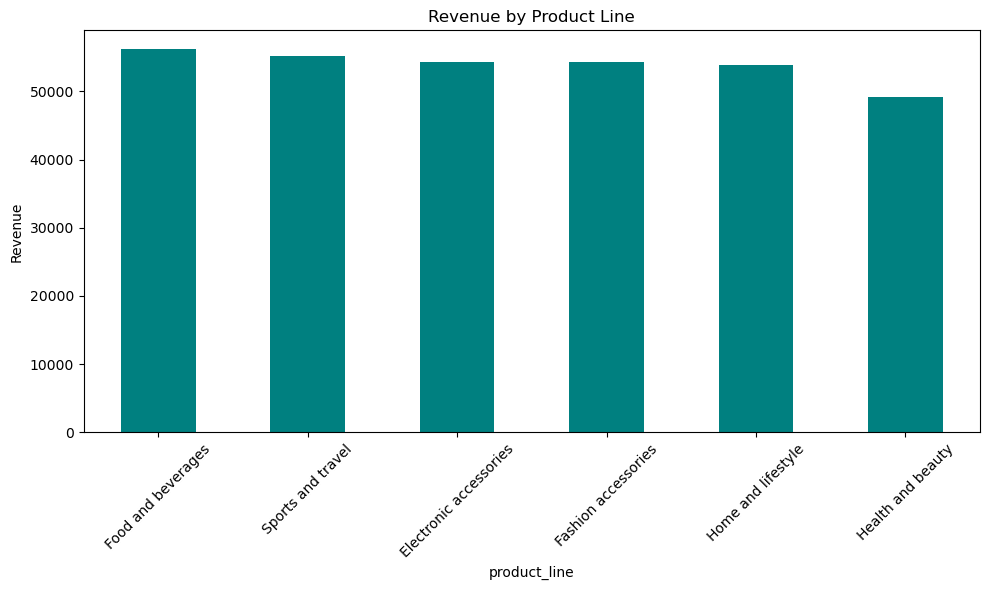

In [116]:
#Most Profitable Product Lines
product_sales = df.groupby('product_line')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='teal')
plt.title("Revenue by Product Line")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


'Food and Beverages' is the highest revenue-generating product line, followed closely by 'Sports and Travel'. 

## Sales Distribution by Branch

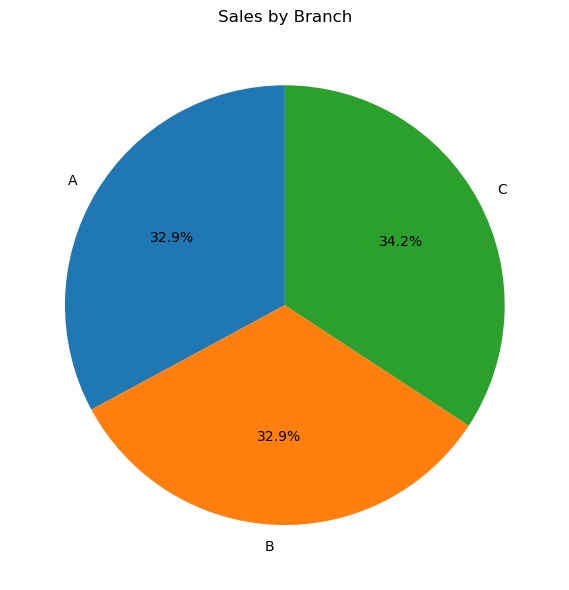

In [121]:
branch_sales = df.groupby('branch')['revenue'].sum()
plt.figure(figsize=(6,6))
branch_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Sales by Branch")
plt.ylabel('')
plt.tight_layout()
plt.show()


## Payment Method Analysis

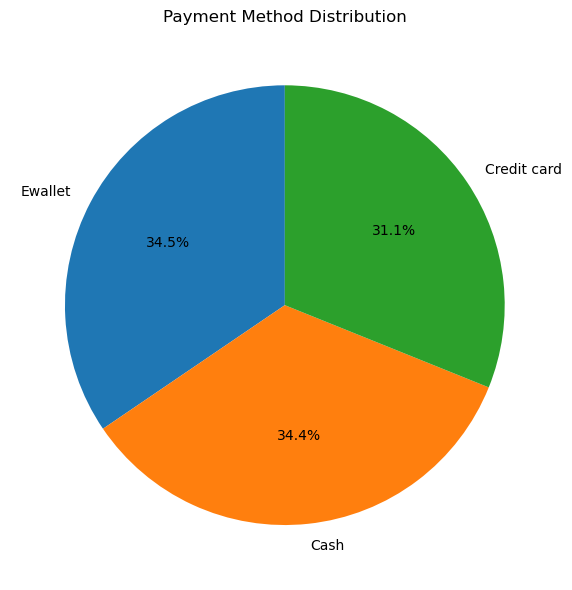

In [124]:
payment_counts = df['payment_method'].value_counts()
plt.figure(figsize=(6,6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()


## Correlation Heatmap of Numeric Columns

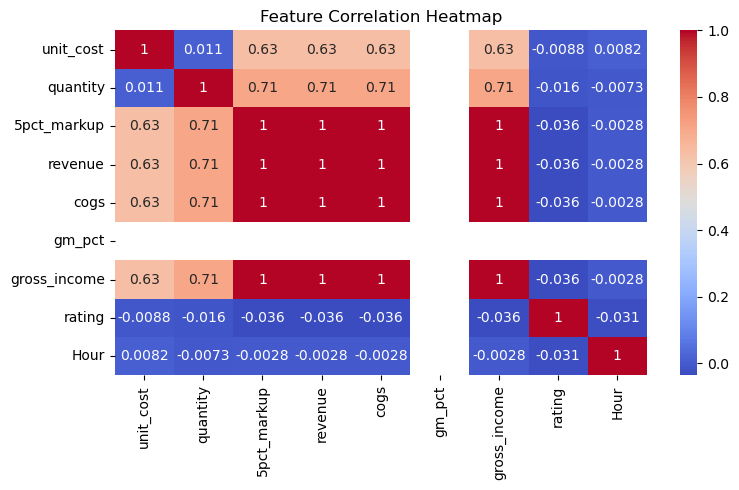

In [127]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


that revenue, cost of goods sold, markup, and gross income are highly correlated (r = 1), indicating potential multicollinearity. These should be carefully selected or transformed when used in predictive modeling. Additionally, variables like 'rating' and 'Hour' show weak correlations with business KPIs, suggesting limited linear predictive power unless non-linear relationships exist."